<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/bjp4Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 96 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.


# **Data Fetch**

In [6]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-09-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#bjp4India")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('bjp4.csv') 

RT @RaoMlc: I wish the illustrious #LKAdvani ji a very happy birthday. An inspiration to all, the nation will remember his work forever! 🙏…
<--------------------------------------------------->
1
RT @MaheshBhatt2016: #bjp4india 
Do you see a disillusion written large, as other than lip sympathy and tweets none in @BJP4India came to h…
<--------------------------------------------------->
2
#BJP4India, take a lesson or #Rawanda_India commission may visit #BJP headquarters. https://t.co/QKfHDHZWg1
<--------------------------------------------------->
3
RT @thejoe1785: Well done sir👏🏻 
The bravery you have done today, the country would be proud of you
#JaiHind #modifailsindia #BJPMurdabaad…
<--------------------------------------------------->
4
Well done sir👏🏻 
The bravery you have done today, the country would be proud of you
#JaiHind #modifailsindia… https://t.co/OPFR6qVFKu
<--------------------------------------------------->
5
RT @NGJoshi8: The Second puppet #bjp4india government in 

# **Importing Libraries**

In [7]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning BJP Dataset 4**



> **Tweet count**



In [8]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

664



> **Removing Duplicates Tweets, if any.**



In [9]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

203

In [10]:
df['Tweet'].duplicated().sum()

461



```
Number of duplicate tweets
```



In [11]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(203, 1)



```
Removed all the duplicate tweets
```



In [12]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [13]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

34

In [14]:
df.shape

(169, 2)

In [15]:
df['Processed_Tweet']

2      #BJP4India, take a lesson or #Rawanda_India co...
4      Well done sir \nThe bravery you have done toda...
7      Breaks my  #bjp4india #NarendraModi why don't ...
8      Now eyes on West Bengal. My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with #...
                             ...                        
197    .... \nDon't make us Regret Our Electoral choi...
198    #bjp4india When can u do something more thn co...
199    @amitmalviya Nobody expected any better from t...
200    #IndiaWithArnab\n#PMOIndia \n#bjp4india \nResp...
201    @sureshkpujari @narendramodi @BJP4Bihar @BJP4I...
Name: Processed_Tweet, Length: 169, dtype: object



> **Removing Usernames**



In [16]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

2      #BJP4India, take a lesson or #Rawanda_India co...
4      Well done sir \nThe bravery you have done toda...
7      Breaks my  #bjp4india #NarendraModi why don't ...
8      Now eyes on West Bengal. My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with #...
                             ...                        
197    .... \nDon't make us Regret Our Electoral choi...
198    #bjp4india When can u do something more thn co...
199      Nobody expected any better from them. But wh...
200    #IndiaWithArnab\n#PMOIndia \n#bjp4india \nResp...
201                   Excellent work sir #bjp4india #NDA
Name: Processed_Tweet, Length: 169, dtype: object



> **Removing URL,if any**



In [17]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

2      #BJP4India, take a lesson or #Rawanda_India co...
4      Well done sir \nThe bravery you have done toda...
7      Breaks my  #bjp4india #NarendraModi why don't ...
8      Now eyes on West Bengal. My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with #...
                             ...                        
197    .... \nDon't make us Regret Our Electoral choi...
198    #bjp4india When can u do something more thn co...
199      Nobody expected any better from them. But wh...
200    #IndiaWithArnab\n#PMOIndia \n#bjp4india \nResp...
201                   Excellent work sir #bjp4india #NDA
Name: Processed_Tweet, Length: 169, dtype: object



> **Removing Hashtags, but keeping the word**



In [18]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

2      BJP4India, take a lesson or Rawanda_India comm...
4      Well done sir \nThe bravery you have done toda...
7      Breaks my  bjp4india NarendraModi why don't yo...
8      Now eyes on West Bengal. My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with B...
                             ...                        
197    .... \nDon't make us Regret Our Electoral choi...
198    bjp4india When can u do something more thn con...
199      Nobody expected any better from them. But wh...
200    IndiaWithArnab\nPMOIndia \nbjp4india \nRespect...
201                     Excellent work sir bjp4india NDA
Name: Processed_Tweet, Length: 169, dtype: object



> **Removing preprocessor library**



In [19]:
!pip install tweet-preprocessor
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

2      BJP4India, take a lesson or Rawanda_India comm...
4      Well done sir The bravery you have done today,...
7      Breaks my bjp4india NarendraModi why don't you...
8      Now eyes on West Bengal. My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with B...
                             ...                        
197    .... Don't make us Regret Our Electoral choice...
198    bjp4india When can u do something more thn con...
199    Nobody expected any better from them. But what...
200    IndiaWithArnabPMOIndia bjp4india Respected PM,...
201                     Excellent work sir bjp4india NDA
Name: Processed_Tweet, Length: 169, dtype: object

> **Removing any special characters, numbers, punctuation, etc** 

In [20]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

2      BJP India  take a lesson or Rawanda India comm...
4      Well done sir The bravery you have done today ...
7      Breaks my bjp india NarendraModi why don t you...
8      Now eyes on West Bengal  My gut feeling is NDA...
9      Arnab Goswami paying Price for Standing with B...
                             ...                        
197         Don t make us Regret Our Electoral choice...
198    bjp india When can u do something more thn con...
199    Nobody expected any better from them  But what...
200    IndiaWithArnabPMOIndia bjp india Respected PM ...
201                     Excellent work sir bjp india NDA
Name: Processed_Tweet, Length: 169, dtype: object



> **Converting to Lowercase**



In [21]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

2      bjp india  take a lesson or rawanda india comm...
4      well done sir the bravery you have done today ...
7      breaks my bjp india narendramodi why don t you...
8      now eyes on west bengal  my gut feeling is nda...
9      arnab goswami paying price for standing with b...
                             ...                        
197         don t make us regret our electoral choice...
198    bjp india when can u do something more thn con...
199    nobody expected any better from them  but what...
200    indiawitharnabpmoindia bjp india respected pm ...
201                     excellent work sir bjp india nda
Name: Processed_Tweet, Length: 169, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [22]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stopwords**



In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['o', 'mightn', 'she', 've', 'any', 'had', 'which', 'her', 'during', 'hadn', "you'd", 'themselves', 'here', 'we', 'from', 'do', 'and', 'am', 'couldn', 'then', 'theirs', 'further', 'be', 'my', 'won', 'again', 'below', 'why', 'too', 'yourselves', 'at', 'some', 'by', 'ma', "that'll", 'hasn', 'doing', 'few', "hadn't", 'once', 'when', 'where', "doesn't", 'whom', "couldn't", 'are', 'the', 's', 'you', 'in', 'all', 'aren', 'having', "didn't", 'myself', 'them', 'been', 'through', 'for', 'into', 'ain', 'against', 'it', 'they', 'same', 'their', "don't", 'if', 'wouldn', 'yourself', 'what', 'me', 'ours', 'most', "hasn't", "isn't", 'these', 'down', "you're", 'a', "shouldn't", "weren't", 'own', 'both', 'but', 'so', 'each', 'an', "mustn't", 'as', 'm', 'who', 'not', 'itself', 'ourselves', "it's", 'on', 'now', 'this', 'only', 'under', "she's", 'needn', 'those', 'i', 'very', "you'll", "wasn't", 'him', "you've", 'have', 'than', 'didn', 'his', 'he', "won't", 'while', 'weren', 'over', 'haven', 'because', 'd

In [25]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

2      bjp india take lesson rawanda india commission...
4      well done sir bravery done today country would...
7      breaks bjp india narendramodi take education m...
8      eyes west bengal gut feeling nda win time mamt...
9      arnab goswami paying price standing bjp one ne...
                             ...                        
197    make us regret electoral choices bjp indialook...
198    bjp india u something thn condemning whn u act...
199    nobody expected better exactly bjp india sitti...
200    indiawitharnabpmoindia bjp india respected pm ...
201                     excellent work sir bjp india nda
Name: Processed_Tweet, Length: 169, dtype: object



> **Tokenizing**



In [26]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

2      [bjp, india, take, lesson, rawanda, india, com...
4      [well, done, sir, bravery, done, today, countr...
7      [breaks, bjp, india, narendramodi, take, educa...
8      [eyes, west, bengal, gut, feeling, nda, win, t...
9      [arnab, goswami, paying, price, standing, bjp,...
                             ...                        
197    [make, us, regret, electoral, choices, bjp, in...
198    [bjp, india, u, something, thn, condemning, wh...
199    [nobody, expected, better, exactly, bjp, india...
200    [indiawitharnabpmoindia, bjp, india, respected...
201              [excellent, work, sir, bjp, india, nda]
Name: Processed_Tweet, Length: 169, dtype: object



> **Stemming**



In [27]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

2      [bjp, india, take, lesson, rawanda, india, com...
4      [well, done, sir, braveri, done, today, countr...
7      [break, bjp, india, narendramodi, take, educ, ...
8      [eye, west, bengal, gut, feel, nda, win, time,...
9      [arnab, goswami, pay, price, stand, bjp, one, ...
                             ...                        
197    [make, us, regret, elector, choic, bjp, indial...
198    [bjp, india, u, someth, thn, condemn, whn, u, ...
199    [nobodi, expect, better, exactli, bjp, india, ...
200    [indiawitharnabpmoindia, bjp, india, respect, ...
201                  [excel, work, sir, bjp, india, nda]
Name: Processed_Tweet, Length: 169, dtype: object

In [28]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
2,"#BJP4India, take a lesson or #Rawanda_India co...","[bjp, india, take, lesson, rawanda, india, com..."
4,Well done sir👏🏻 \nThe bravery you have done to...,"[well, done, sir, braveri, done, today, countr..."
7,Breaks my 💔 #bjp4india #NarendraModi why don't...,"[break, bjp, india, narendramodi, take, educ, ..."
8,Now eyes on West Bengal. My gut feeling is NDA...,"[eye, west, bengal, gut, feel, nda, win, time,..."
9,Arnab Goswami paying Price for Standing with #...,"[arnab, goswami, pay, price, stand, bjp, one, ..."
...,...,...
197,.... \nDon't make us Regret Our Electoral choi...,"[make, regret, elector, choic, bjp, indialook,..."
198,#bjp4india When can u do something more thn co...,"[bjp, india, someth, thn, condemn, whn, act, i..."
199,@amitmalviya Nobody expected any better from t...,"[nobodi, expect, better, exactli, bjp, india, ..."
200,#IndiaWithArnab\n#PMOIndia \n#bjp4india \nResp...,"[indiawitharnabpmoindia, bjp, india, respect, ..."


In [29]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

1573

In [30]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

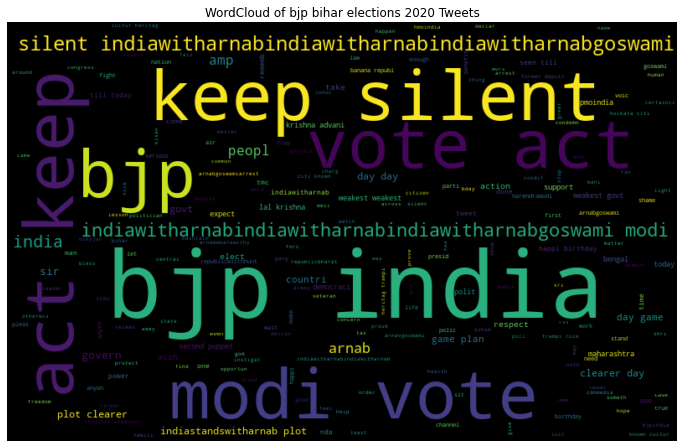

In [31]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [32]:
from textblob import TextBlob

In [33]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

169

In [34]:
df['Processed_Tweet']

2      [bjp, india, take, lesson, rawanda, india, com...
4      [well, done, sir, braveri, done, today, countr...
7      [break, bjp, india, narendramodi, take, educ, ...
8      [eye, west, bengal, gut, feel, nda, win, time,...
9      [arnab, goswami, pay, price, stand, bjp, one, ...
                             ...                        
197    [make, regret, elector, choic, bjp, indialook,...
198    [bjp, india, someth, thn, condemn, whn, act, i...
199    [nobodi, expect, better, exactli, bjp, india, ...
200    [indiawitharnabpmoindia, bjp, india, respect, ...
201                  [excel, work, sir, bjp, india, nda]
Name: Processed_Tweet, Length: 169, dtype: object

In [35]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 35
Negative Tweets: 21
Neutral Tweets 113




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.634,0.366,0.6369
2,0.105,0.806,0.089,-0.0516
3,0.202,0.578,0.220,0.0772
4,0.099,0.709,0.191,0.3182
...,...,...,...,...
164,0.196,0.629,0.175,-0.0772
165,0.245,0.755,0.000,-0.3818
166,0.000,0.734,0.266,0.4404
167,0.000,0.693,0.307,0.4767


In [38]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.634,0.366,0.6369,Positive
2,0.105,0.806,0.089,-0.0516,Negative
3,0.202,0.578,0.220,0.0772,Positive
4,0.099,0.709,0.191,0.3182,Positive


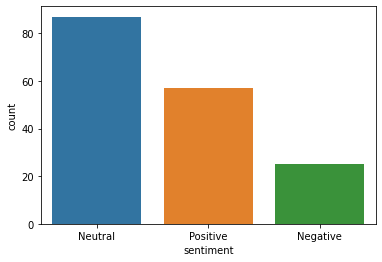

In [39]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)